In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from math import ceil

In [6]:
fetch = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)

In [88]:
org = pd.concat([
    pd.DataFrame(fetch['data'], columns = fetch['feature_names']),
    pd.DataFrame(fetch['target'], columns = fetch['target_names'])
], axis = 1)

In [89]:
train = pd.read_csv('train.csv')

train = pd.concat([train, org])

test = pd.read_csv('test.csv')
ids = test['id']

train = train.drop(columns = ['id'])
test = test.drop(columns = ['id'])

In [90]:
df = pd.concat([train, test])
df = df.reset_index(drop=True)

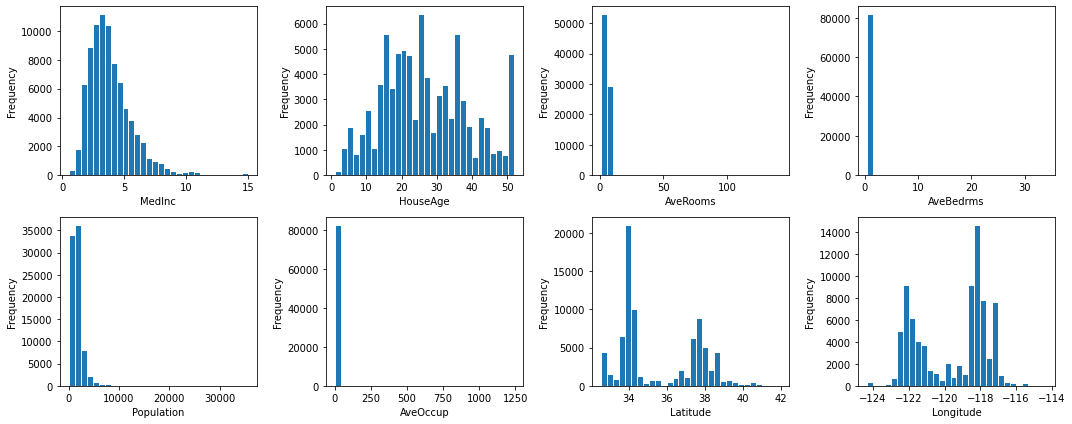

In [91]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
    
for j, col in enumerate(df.columns[:-1]):
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

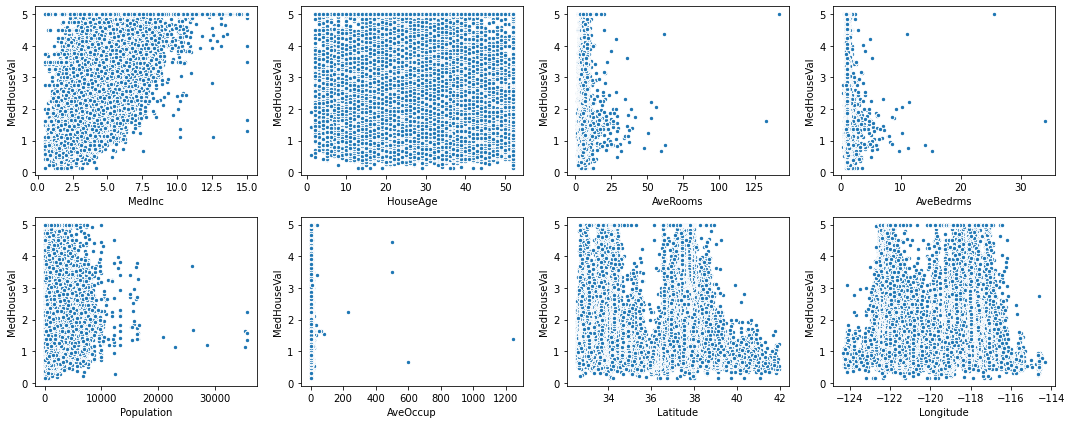

In [92]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
    
for j, col in enumerate(df.columns[:-1]):

    df.plot.scatter(x=col, y='MedHouseVal', ax = axes[j], edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

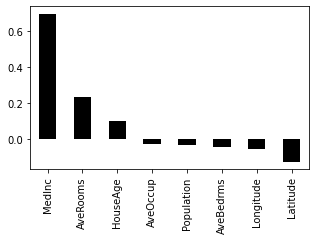

In [93]:
df.corr()['MedHouseVal'].sort_values(ascending=False)[1:].plot.bar(figsize=(5,3), cmap='copper')
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

features = X.columns.values

Scaler = StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [95]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.6036472758914934
Validation score:  0.6005405991050674


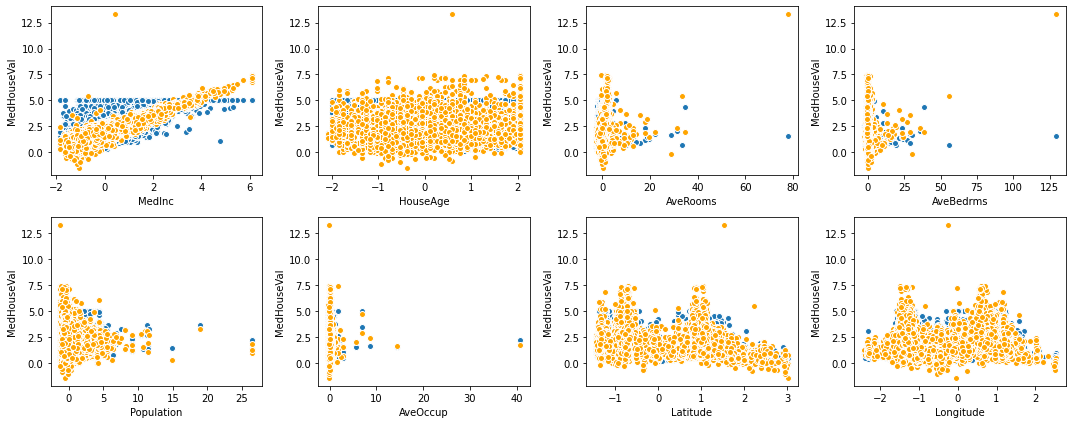

In [96]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(df.columns[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("MedHouseVal")

plt.tight_layout()

In [97]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.8632010403074274
Validation score:  0.7809129256861794


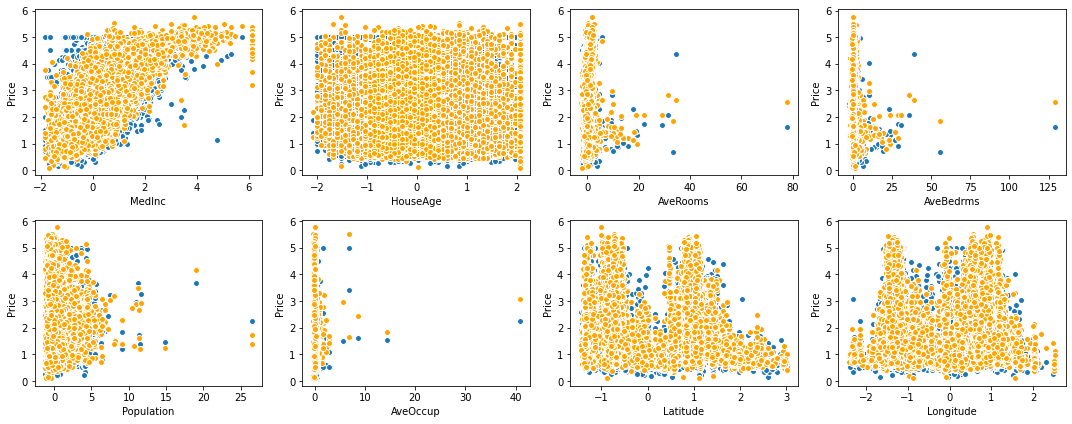

In [98]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(df.columns[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Price")
    
plt.tight_layout()

In [99]:
final_model = XGBRegressor()
final_model.fit(X, y)
print("Training score: ", final_model.score(X, y))
y_test_pred = final_model.predict(X_test)

Training score:  0.850858001828245


In [100]:
output = pd.DataFrame({'id': ids, 'MedHouseVal': y_test_pred})

In [101]:
output.to_csv("Submission2.csv", index=False)